# Lab2 - Recurrent Neural Network

#### 1) Lab Task

- Imports :

In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

- Générer X aléatoirement :

In [748]:
X = np.random.randint(2, size=(40,10))

- Calculer Y :

In [749]:
Y = np.sum(X, axis=1)

- Separer X,Y en X_train, X_test, Y_train, Y_test :

In [750]:
X_train = X[:30]
X_test = X[30:]

Y_train = Y[:30]
Y_test = Y[30:]

### 1) HomeWork Task

- Renseignement des dimensions/constantes :

In [821]:
# Nombre d'exemples d'entrainement
I = len(X_train)
print("I =", I)

# Longeur des séquences
T = X_train.shape[1]
print("T =", T)

# Valeur initiale de la fonction de propagation
F0 = 0
print("F0 =", F0)

# Nombre d'iteration
iteration = 10000
print("iteration =", iteration)

# Grande valeurs de Vf pour la partie 3
L_Vf = 45
print("L_Vf =", L_Vf)

# Grande valeurs de Vx pour la partie 3
L_Vx = 10
print("L_Vx =", L_Vx)

I = 30
T = 10
F0 = 0
iteration = 10000
L_Vf = 45
L_Vx = 10


In [790]:
def dataInit() :
    
    # Poids initial appliqué à F (avant la Back Propagation)
    Vf = np.random.rand()

    # Poids initial appliqué à X (avant la Back Propagation)
    Vx = np.random.rand()
    
    return Vf, Vx

def derivatedInit() :
    
    # Initialisation de la dérivée partielle de l'erreur par Vx
    dE_dVx_old = 0
    
    # Initialisation de la dérivée partielle de l'erreur par Vx
    dE_dVf_old = 0
    
    return dE_dVx_old, dE_dVf_old

- Fonction de Forward Propagation :

In [791]:
def FP(X, Vx, Vf):
    Ŷ = []
    F = []
    for X_i in X :
        f_i_0 = F0
        f = []
        for X_i_t in X_i:
            f_i_0 = Vf*f_i_0 + Vx*X_i_t
            f.append(f_i_0)
        F.append(f)
        Ŷ.append(f_i_0)
    return Ŷ, np.array(F)

- Calcul des dérivées partielles de l'erreur :

In [792]:
# Calcul de la dérivée partielle de E en fonction de Vx
def derErreurVx(Ŷ, X, Y, Vf) :
    dE_dVx = 0
    for t in range (1,T) :
        a = 0
        for i in range(len(X)) :
            a += (Ŷ[i]-Y[i])*X[i][t-1]
        dE_dVx += a*((Vf)**(T-t))
    return dE_dVx


# Calcul de la dérivée partielle de E en fonction de Vf
def derErreurVf(Ŷ, F, Y, Vf) :
    dE_dVf = 0
    for t in range (1,T) :
        c = 0
        for i in range(len(F)) :
            if t > 1 :
                c += (Ŷ[i]-Y[i])*F[i][t-2]
        dE_dVf += c*((Vf)**(T-t))
    return dE_dVf

### 1) a. 

- Fonction de Back Propagation :

In [793]:
def BP(Ŷ, F, X_train, Y_train, Vx, Vf) :
    
    # Taux d'apprentissage associé à X (BP)
    𝛼_x = 0.001

    # Taux d'apprentissage associé à F (BP)
    𝛼_f = 0.001

    # Calcul des dérivées
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)

    # Correction des poids 
    Vx -= 𝛼_x*dE_dVx

    Vf -= 𝛼_f*dE_dVf

    return Vx, Vf

### 1) b. 

- Fonction de Resilient Propagation :

In [794]:
def RP(Ŷ, F, X_train, Y_train, Vx, Vf, itera, dE_dVx_old, dE_dVf_old) :
    
   # Taux d'apprentissage associé à X (RP)
    Δ_x = 0.001

    # Taux d'apprentissage associé à F (RP)
    Δ_f = 0.001
    
    # Taux de correction avançant pour Δ (RP)
    ƞ_p = 1.2

    # Taux de correction reculant pour Δ (RP)
    ƞ_n = 0.5
    
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)
        
    # Correction des poids 
    
    if itera == 0 : # Si c'est le premier tour
        Vx -= Δ_x * dE_dVx
        Vf -= Δ_f * dE_dVf
        
    else : # Pour tous les autres tours
        
        # Correction de Δ_x
        if np.sign(dE_dVx) == np.sign(dE_dVx_old) :
            Δ_x = Δ_x*ƞ_p
        else :
            Δ_x = Δ_x*ƞ_n
        
        # Correction de Δ_x
        if np.sign(dE_dVf) == np.sign(dE_dVf_old) :
            Δ_f = Δ_f*ƞ_p
        else :
            Δ_f = Δ_f*ƞ_n
            
        Vx -= Δ_x*np.sign(dE_dVx)
        Vf -= Δ_f*np.sign(dE_dVf)
    
    return Vx, Vf, dE_dVx, dE_dVf

### 1) c.  

- Fonction de Gradient Clipping :

In [795]:
def GC(Ŷ, F, X_train, Y_train, Vx, Vf) :
    
    # Norme (GC)
    ƞ = 10
    
    # Taux d'apprentissage associé à X (BP)
    𝛼_x = 0.001

    # Taux d'apprentissage associé à F (BP)
    𝛼_f = 0.001
    
    # Calcul des dérivées
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)
    
    # Definition du vecteur gradient
    dE_dV = [dE_dVx, dE_dVf]
        
    # Calcul de la norme du vecteur gradient
    norm = np.linalg.norm([dE_dVx, dE_dVf])

    # Bornage de la norme du gradient
    if norm > ƞ :
        dE_dV = ƞ * ([dE_dVx, dE_dVf] / norm)

    # Correction des poids
    Vx -= 𝛼_x*dE_dV[0]
    Vf -= 𝛼_f*dE_dV[1]

    return Vx, Vf, norm

### 2) 

- Comparaison des trois méthodes :

In [796]:
#Initialisation des données
Vf, Vx = dataInit()

Vf_BP = Vf
Vf_RP = Vf
Vf_GC = Vf

Vx_BP = Vx
Vx_RP = Vx
Vx_GC = Vx

dE_dVx_old, dE_dVf_old = derivatedInit()

# Création de rtois listes d'erreur pour le graphe
Err_BP = []
Err_RP = []
Err_GC = []

for itera in range (iteration) :
    
            # Back Propagation :
        
    # Appel de la fonction de forward propagation
    Ŷ_BP, F_BP = FP(X_train, Vx_BP, Vf_BP)
    # Calcul de l'erreur 
    E_BP = (1/2)*np.sum((Ŷ_BP - Y_train)**2)
    # Appel de la fonction de back propagation
    Vx_BP, Vf_BP = BP(Ŷ, F, X_train, Y_train, Vx_BP, Vf_BP)
    # Ajout de l'erreur à la liste Erreur
    Err_BP.append([E_BP, Vx_BP, Vf_BP])
    
    
            # Resilent Propagation : 
        
        # Appel de la fonction de forward propagation
    Ŷ_RP, F_RP = FP(X_train, Vx_RP, Vf_RP)
    # Calcul de l'erreur 
    E_RP = (1/2)*np.sum((Ŷ_RP - Y_train)**2)
    # Appel de la fonction de resilient propagation
    Vx_RP, Vf_RP, dE_dVx_old, dE_dVf_old = RP(Ŷ_RP, F, X_train, Y_train, Vx_RP, Vf_RP, itera, dE_dVx_old, dE_dVf_old)
    # Ajout de l'erreur à la liste Erreur
    Err_RP.append([E_RP, Vx_RP, Vf_RP])

    
            # Gradient Clipping :
            
    # Appel de la fonction de forward propagation
    Ŷ_GC, F_GC = FP(X_train, Vx_GC, Vf_GC)
    # Calcul de l'erreur 
    E_GC = (1/2)*np.sum((Ŷ_GC - Y_train)**2)
    # Appel de la fonction de resilient propagation
    Vx_GC, Vf_GC, norm = GC(Ŷ_GC, F_GC, X_train, Y_train, Vx_GC, Vf_GC)
    # Ajout de l'erreur à la liste Erreur
    Err_GC.append([E_GC, Vx_GC, Vf_GC])
    
    
Erreur_BP = pd.DataFrame(data = Err_BP, columns = ['erreur', 'Vx', 'Vf'])
Erreur_RP = pd.DataFrame(data = Err_RP, columns = ['erreur', 'Vx', 'Vf'])
Erreur_GC = pd.DataFrame(data = Err_GC, columns = ['erreur', 'Vx', 'Vf'])

# Affichage de l'évolution des erreurs
print("Back Propagation :")
print(Erreur_BP['erreur'], "\n")
print("Resilient Propagation :")
print(Erreur_RP['erreur'], "\n")
print("Gradient Clipping :")
print(Erreur_GC['erreur'])

Back Propagation :
0       367.274210
1       367.293211
2       367.312063
3       367.330769
4       367.349329
           ...    
9995    369.899305
9996    369.899305
9997    369.899305
9998    369.899305
9999    369.899305
Name: erreur, Length: 10000, dtype: float64 

Resilient Propagation :
0       367.274210
1       366.815282
2       366.668253
3       366.520898
4       366.373216
           ...    
9995      0.035807
9996      0.038815
9997      0.033293
9998      0.044996
9999      0.035807
Name: erreur, Length: 10000, dtype: float64 

Gradient Clipping :
0       367.274210
1       366.970111
2       366.648326
3       366.307524
4       365.946238
           ...    
9995      0.059641
9996      0.512504
9997      0.059641
9998      0.512504
9999      0.059641
Name: erreur, Length: 10000, dtype: float64


- Aperçu Global de l'erreur en fonction du modèle :

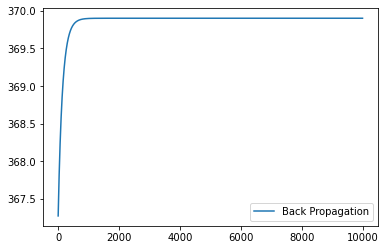

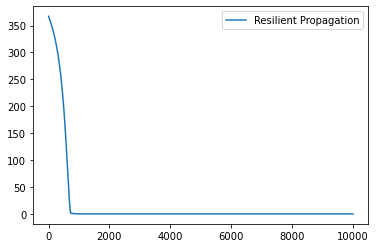

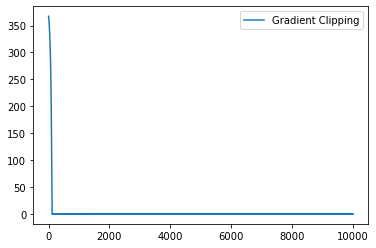

In [797]:
plt.plot(range(iteration), Erreur_BP['erreur'], label="Back Propagation")
plt.legend()
plt.show()
plt.plot(range(iteration), Erreur_RP['erreur'], label="Resilient Propagation")
plt.legend()
plt.show()
plt.plot(range(iteration), Erreur_GC['erreur'], label="Gradient Clipping")
plt.legend()
plt.show()

La valeur de l'erreur a explosé pour le modèle du Back Propagation, tandis que les deux autres modèles montrent une convergence avec une diminution de l'erreur qui se rapproche de 0.

### 3)

- Test des trois modèles avec des poids élevés : Vf = 45 et Vx = 10

In [825]:
#Initialisation des données
dE_dVx_old, dE_dVf_old = derivatedInit()

Vf_BP = L_Vf
Vf_RP = L_Vf
Vf_GC = L_Vf

Vx_BP = L_Vx
Vx_RP = L_Vx
Vx_GC = L_Vx

Err_BP = []
Err_RP = []
Err_GC = []

for itera in range (iteration) :
    
            # Back Propagation :
        
    # Appel de la fonction de forward propagation
    Ŷ_BP, F_BP = FP(X_train, Vx_BP, Vf_BP)
    # Calcul de l'erreur 
    E_BP = (1/2)*np.sum((Ŷ_BP - Y_train)**2)
    # Appel de la fonction de back propagation
    Vx_BP, Vf_BP = BP(Ŷ, F, X_train, Y_train, Vx_BP, Vf_BP)
    # Ajout de l'erreur à la liste Erreur
    Err_BP.append(E_BP)
    
    
            # Resilent Propagation : 
        
        # Appel de la fonction de forward propagation
    Ŷ_RP, F_RP = FP(X_train, Vx_RP, Vf_RP)
    # Calcul de l'erreur 
    E_RP = (1/2)*np.sum((Ŷ_RP - Y_train)**2)
    # Appel de la fonction de resilient propagation
    Vx_RP, Vf_RP, dE_dVx_old, dE_dVf_old = RP(Ŷ_RP, F, X_train, Y_train, Vx_RP, Vf_RP, itera, dE_dVx_old, dE_dVf_old)
    # Ajout de l'erreur à la liste Erreur
    Err_RP.append(E_RP)
        
        
            # Gradient Clipping :
            
    # Appel de la fonction de forward propagation
    Ŷ_GC, F_GC = FP(X_train, Vx_GC, Vf_GC)
    # Calcul de l'erreur 
    E_GC = (1/2)*np.sum((Ŷ_GC - Y_train)**2)
    # Appel de la fonction de resilient propagation
    Vx_GC, Vf_GC, norm = GC(Ŷ_GC, F_GC, X_train, Y_train, Vx_GC, Vf_GC)
    # Ajout de l'erreur à la liste Erreur
    Err_GC.append(E_GC)

<ipython-input-792-007ff2955980>:8: RuntimeWarning: overflow encountered in long_scalars
  dE_dVx += a*((Vf)**(T-t))
<ipython-input-792-007ff2955980>:20: RuntimeWarning: overflow encountered in long_scalars
  dE_dVf += c*((Vf)**(T-t))
<ipython-input-792-007ff2955980>:19: RuntimeWarning: overflow encountered in long_scalars
  c += (Ŷ[i]-Y[i])*F[i][t-2]
<ipython-input-825-427b14fc1591>:35: RuntimeWarning: overflow encountered in square
  E_RP = (1/2)*np.sum((Ŷ_RP - Y_train)**2)
<ipython-input-792-007ff2955980>:8: RuntimeWarning: overflow encountered in double_scalars
  dE_dVx += a*((Vf)**(T-t))
<ipython-input-792-007ff2955980>:8: RuntimeWarning: invalid value encountered in double_scalars
  dE_dVx += a*((Vf)**(T-t))
<ipython-input-792-007ff2955980>:20: RuntimeWarning: overflow encountered in double_scalars
  dE_dVf += c*((Vf)**(T-t))
<ipython-input-792-007ff2955980>:20: RuntimeWarning: invalid value encountered in double_scalars
  dE_dVf += c*((Vf)**(T-t))


- Représentation graphique :

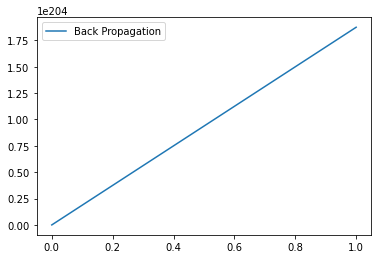

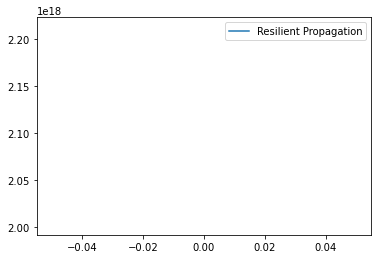

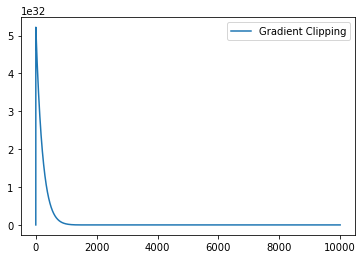

In [826]:
plt.plot(range(iteration), Err_BP, label="Back Propagation")
plt.legend()
plt.show()
plt.plot(range(iteration), Err_RP,label="Resilient Propagation")
plt.legend()
plt.show()
plt.plot(range(iteration), Err_GC, label="Gradient Clipping")
plt.legend()
plt.show()

On remarque que l'erreur du modèle de la Back Propagation explose plus vite, dès les premières itérations. L'erreur du modèle du Resilient Propagation quant à lui explose pour ces poids choisis très grands.
Enfin, l'erreur du modèle de Gradient Clipping descend rapidement et tend plus lentement vers 0.

- On affiche ici la dernière valeur de l'erreur après n itérations pour chaque modèle :

In [827]:
print("Erreur de la Back Propagation :", Err_BP[-1:])
print("Erreur de la Back Propagation :", Err_RP[-1:])
print("Erreur de la Back Propagation :", Err_GC[-1:])

Erreur de la Back Propagation : [nan]
Erreur de la Back Propagation : [nan]
Erreur de la Back Propagation : [1.9021499058155036e+24]


L'erreur du Gradient Clipping reste encore très grande !
Il faudrait plus d'itérations pour que l'erreur du Gradient Clipping soit aux alentours de 0. Pour les deux autres modèles, l'erreur ne pourra jamais se réduire puisqu'elle a complétement divergé.

### 4)

(Pour cette partie, on récupère les résultats du test de la partie 2)

On va récupérer les valeurs des poids de chaque modèle pour lesquelles l'erreur est la plus petite. Pour rappel, nous cherchons a faire apprendre aux modèles la fonction de somme, les poids doivent donc être tous les deux les plus proches possible de 1 pour que la prédiction soit la plus proche de la vérité.

In [801]:
Vf_BP = float(Erreur_BP['Vf'][Erreur_BP['erreur']==Erreur_BP['erreur'].min()])
Vx_BP = float(Erreur_BP['Vx'][Erreur_BP['erreur']==Erreur_BP['erreur'].min()])

Vf_RP = Erreur_RP['Vf'][Erreur_RP['erreur']==Erreur_RP['erreur'].min()]
Vx_RP = Erreur_RP['Vx'][Erreur_RP['erreur']==Erreur_RP['erreur'].min()]

if len(Vf_RP) > 1 :
    Vf_RP = float(Vf_RP[:1])
    Vx_RP = float(Vx_RP[:1])

Vf_GC = Erreur_GC['Vf'][Erreur_GC['erreur']==Erreur_GC['erreur'].min()]
Vx_GC = Erreur_GC['Vx'][Erreur_GC['erreur']==Erreur_GC['erreur'].min()]

if len(Vf_GC) > 1 :
    Vf_GC = float(Vf_GC[:1])
    Vx_GC = float(Vx_GC[:1])


print("\t Poids les plus adaptés en fonction de leur modèle :")
print("Back Propagation : Vf =", Vf_BP, " et Vx = ", Vx_BP)
print("Resilient Propagation : Vf =", float(Vf_RP), " et Vx = ", float(Vx_RP))
print("Gradient Clipping : Vf =", float(Vf_GC), " et Vx = ", float(Vx_GC))

	 Poids les plus adaptés en fonction de leur modèle :
Back Propagation : Vf = 0.03999126297184888  et Vx =  0.5160329690358343
Resilient Propagation : Vf = 0.9884268168964392  et Vx =  1.0600528943269916
Gradient Clipping : Vf = 1.0065732292134035  et Vx =  1.0046230118991513


- Evolution des poids Vf et Vx :

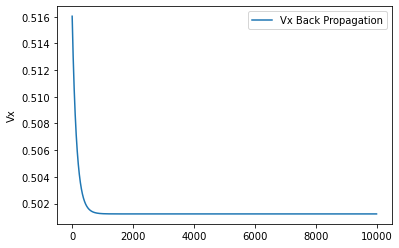

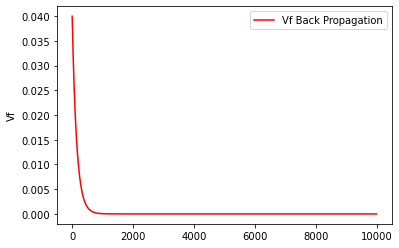

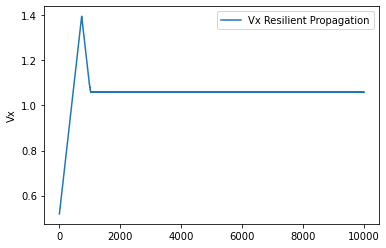

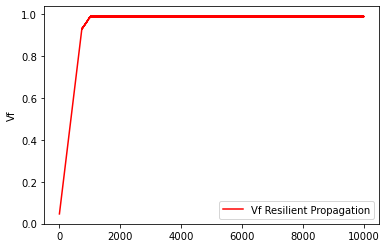

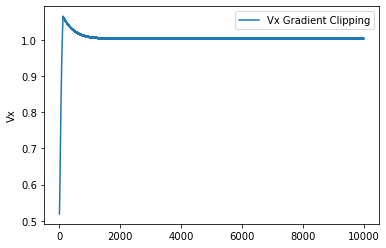

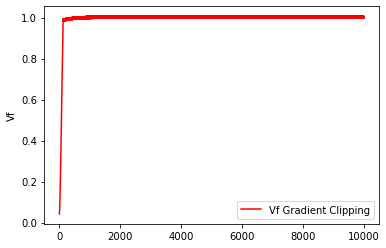

In [816]:
        # Back Propagation :
fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_BP['Vx'], label="Vx Back Propagation")
ax.set(ylabel='Vx')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_BP['Vf'], 'r', label="Vf Back Propagation")
ax.set(ylabel='Vf')
plt.legend()
plt.show()

        # Resilient Propagation :
fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_RP['Vx'], label="Vx Resilient Propagation")
ax.set(ylabel='Vx')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_RP['Vf'], 'r', label="Vf Resilient Propagation")
ax.set(ylabel='Vf')
plt.legend()
plt.show()

        # Gradient Clipping :
fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_GC['Vx'], label="Vx Gradient Clipping")
ax.set(ylabel='Vx')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(range(iteration), Erreur_GC['Vf'], 'r', label="Vf Gradient Clipping")
ax.set(ylabel='Vf')
plt.legend()
plt.show()

- Test du Back Propagation :

In [817]:
# Prédiction
Ŷ_BP, F_BP = FP(X_test, Vf_BP, Vf_BP)
E = (1/2)*np.sum((Ŷ_BP - Y_test)**2)
print("Erreur :", E)

# Affichage de l'écart pour chaque ligne avec la réalité
for i in range(len(Ŷ_BP)) :
    print("Ŷ_BP = ", Ŷ_BP[i], " et Y = ", Y_test[i])

# Calcul du pourcentage d'erreur
err = []
err.append(np.mean(np.abs((Y_test-Ŷ_BP)/Y_test*100)))
print("Pourcentage de l'erreur :", np.mean(np.abs((Y_test-Ŷ_BP)/Y_test*100)))

Erreur : 92.9037775869611
Ŷ_BP =  2.561861230566245e-06  et Y =  3
Ŷ_BP =  0.04165708401230698  et Y =  6
Ŷ_BP =  0.04005522104981552  et Y =  3
Ŷ_BP =  0.001601961166351964  et Y =  3
Ŷ_BP =  0.040057881102083914  et Y =  5
Ŷ_BP =  0.001663361637312598  et Y =  4
Ŷ_BP =  6.396216232101643e-05  et Y =  3
Ŷ_BP =  0.001663361644126847  et Y =  7
Ŷ_BP =  0.0016632593490977143  et Y =  3
Ŷ_BP =  2.56185496050129e-06  et Y =  4
Pourcentage de l'erreur : 99.69929150616173


- Test du Resilient Propagation :

In [818]:
# Prédiction
Ŷ_RP, F = FP(X_test, Vx_RP, Vf_RP)
E = (1/2)*np.sum((Ŷ_RP - Y_test)**2)
print("Erreur :", E)

# Affichage de l'écart pour chaque ligne avec la réalité
for i in range(len(Ŷ_RP)) :
    print("Ŷ_RP = ", Ŷ_RP[i], " et Y = ", Y_test[i])
    
# Calcul du pourcentage d'erreur
err.append(np.mean(np.abs((Y_test-Ŷ_RP)/Y_test*100)))
print("Pourcentage de l'erreur :", np.mean(np.abs((Y_test-Ŷ_RP)/Y_test*100)))

Erreur : 0.02867508930636956
Ŷ_RP =  3.000888445553639  et Y =  3
Ŷ_RP =  6.133076390370125  et Y =  6
Ŷ_RP =  3.0728117595894  et Y =  3
Ŷ_RP =  3.0832828338092635  et Y =  3
Ŷ_RP =  5.108309885317177  et Y =  5
Ŷ_RP =  4.0838096259161984  et Y =  4
Ŷ_RP =  3.001566149657156  et Y =  3
Ŷ_RP =  6.981317097539338  et Y =  7
Ŷ_RP =  3.0719841384929114  et Y =  3
Ŷ_RP =  3.944195194255454  et Y =  4
Pourcentage de l'erreur : 1.5825841180690776


- Test du Gradient Clipping :

In [819]:
# Prédiction
Ŷ_GC, F = FP(X_test, float(Vx_GC), float(Vf_GC))
E = (1/2)*np.sum((Ŷ_GC - Y_test)**2)
print("Erreur :", E)

# Affichage de l'écart pour chaque ligne avec la réalité
for i in range(len(Ŷ_GC)) :
    print("Ŷ_BP = ", Ŷ_GC[i], " et Y = ", Y_test[i])
    
# Calcul du pourcentage d'erreur
err.append(np.mean(np.abs((Y_test-Ŷ_GC)/Y_test*100)))
print("Pourcentage de l'erreur :", np.mean(np.abs((Y_test-Ŷ_GC)/Y_test*100)))

Erreur : 0.10396394272462445
Ŷ_BP =  3.1144123369541177  et Y =  3
Ŷ_BP =  6.155049156591168  et Y =  6
Ŷ_BP =  3.074266599926135  et Y =  3
Ŷ_BP =  3.0670900666520593  et Y =  3
Ŷ_BP =  5.130130037348771  et Y =  5
Ŷ_BP =  4.105300906754077  et Y =  4
Ŷ_BP =  3.1146351449768175  et Y =  3
Ŷ_BP =  7.281396728643734  et Y =  7
Ŷ_BP =  3.074001839817214  et Y =  3
Ŷ_BP =  4.186968290089899  et Y =  4
Pourcentage de l'erreur : 3.1326969488478107


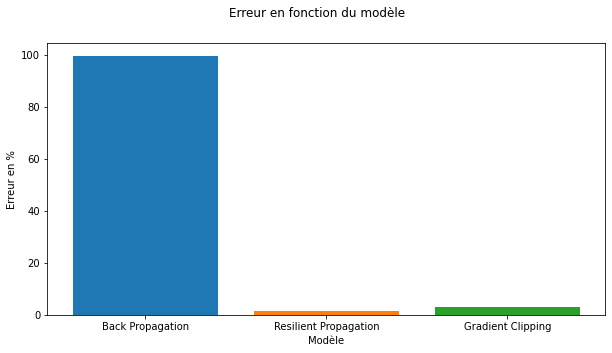

In [820]:
plt.figure(figsize=(10, 5))
plt.bar(['Back Propagation', 'Resilient Propagation', 'Gradient Clipping'], err, color=mcolors.TABLEAU_COLORS)
plt.suptitle('Erreur en fonction du modèle')
plt.xlabel("Modèle")
plt.ylabel("Erreur en %")
plt.show()